[This](https://www.kaggle.com/c/instant-gratification/discussion/93169#latest-536109) beautiful animation from Chris shows after filtering `wheezy-copper-turtle-magic` data could be splitted into useful and useless features based on features variances. However, this kernel shows, using all features could result in a better hyperplane as opposed to using useful features only. The hyperplane, when using all features, cuts through the data so perfectly that I thought (actually still think) there is a leakage.

Animations could be found in output section.

In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score
# LOAD THE DATA
test = pd.read_csv('../input/test.csv')
train = pd.read_csv('../input/train.csv')

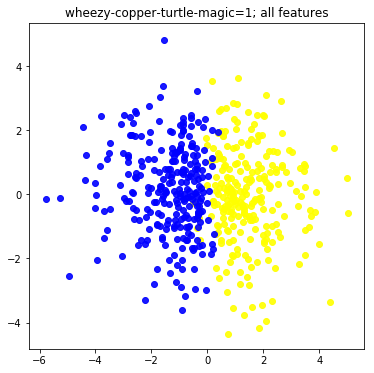

In [6]:
train2 = train.loc[train['wheezy-copper-turtle-magic'] == 1, :].reset_index(drop=True)
train2.drop('id', axis=1, inplace=True)
target2 = train2.target
train2.drop('target', axis=1, inplace=True)
cols = [c for c in train2.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
train2 = train2[cols].values
# FIND NORMAL TO HYPERPLANE
clf = LogisticRegression(solver='liblinear',penalty='l2',C=0.1,class_weight='balanced')
clf.fit(train2, target2)
u1 = clf.coef_[0]
u1 = u1/np.sqrt(u1.dot(u1))
# CREATE RANDOM DIRECTION PERPENDICULAR TO U1
u2 = np.random.normal(0,1,len(u1))
u2 = u2 - u1.dot(u2)*u1
u2 = u2/np.sqrt(u2.dot(u2))

# CREATE RANDOM DIRECTION PERPENDICULAR TO U1 AND U2
u3 = np.random.normal(0,1,len(u1))
u3 = u3 - u1.dot(u3)*u1 - u2.dot(u3)*u2
u3 = u3/np.sqrt(u3.dot(u3))
idx0 = np.where(target2==0)
idx1 = np.where(target2==1)
# CREATE AN ANIMATION
images = []
steps = 60
fig = plt.figure(figsize=(8,8))
for k in range(steps):
    # CALCULATE NEW ANGLE OF ROTATION
    angR = k*(2*np.pi/steps)
    angD = round(k*(360/steps),0)
    u4 = np.cos(angR)*u1 + np.sin(angR)*u2
    u = np.concatenate([u4,u3]).reshape((2,len(u1)))  
    # PROJECT TRAIN AND TEST ONTO U3,U4 PLANE
    p = u.dot(train2.transpose())
    # PLOT TRAIN DATA (KEEP CORRECT COLOR IN FRONT)
    if angD<180:
        plt.title('wheezy-copper-turtle-magic=1; all features')
        img2 = plt.scatter(p[0,idx1],p[1,idx1],c='yellow')
        img3 = plt.scatter(p[0,idx0],p[1,idx0],c='blue')
    else:
        plt.title('wheezy-copper-turtle-magic=1; all features')
        img2 = plt.scatter(p[0,idx0],p[1,idx0],c='blue')
        img3 = plt.scatter(p[0,idx1],p[1,idx1],c='yellow')
    images.append([img2, img3])
# SAVE MOVIE TO FILE
ani = ArtistAnimation(fig, images)
ani.save('all_features.gif', writer='imagemagick', fps=15)
plt.close()
# PROJECT TRAIN ONTO U2, U3 PLANE
u = np.concatenate([u1,u2]).reshape((2,len(u1)))
p = u.dot(train2.transpose())
plt.figure(figsize=(6,6))
plt.title('wheezy-copper-turtle-magic=1; all features')
plt.scatter(p[0,idx1],p[1,idx1],c='yellow', alpha=0.9)
plt.scatter(p[0,idx0],p[1,idx0],c='blue', alpha=0.9)
print(f'ROC: {roc_auc_score(target2, clf.predict(train2))}')

Now compare it to when we use only useful features

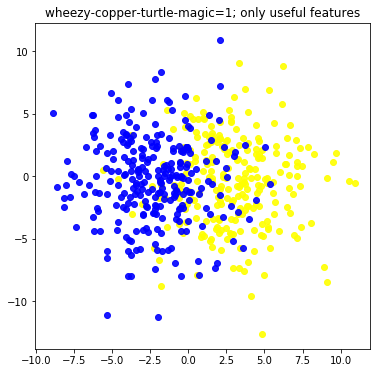

In [9]:
train2 = train.loc[train['wheezy-copper-turtle-magic'] == 1, :].reset_index(drop=True)
train2.drop('id', axis=1, inplace=True)
target2 = train2.target
train2.drop('target', axis=1, inplace=True)
cols = [c for c in train2.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
sel = VarianceThreshold(threshold=1.5).fit(train2[cols])
train2 = sel.transform(train2[cols])
# FIND NORMAL TO HYPERPLANE
clf = LogisticRegression(solver='liblinear',penalty='l2',C=0.1,class_weight='balanced')
clf.fit(train2, target2)
u1 = clf.coef_[0]
u1 = u1/np.sqrt(u1.dot(u1))
# CREATE RANDOM DIRECTION PERPENDICULAR TO U1
u2 = np.random.normal(0,1,len(u1))
u2 = u2 - u1.dot(u2)*u1
u2 = u2/np.sqrt(u2.dot(u2))

# CREATE RANDOM DIRECTION PERPENDICULAR TO U1 AND U2
u3 = np.random.normal(0,1,len(u1))
u3 = u3 - u1.dot(u3)*u1 - u2.dot(u3)*u2
u3 = u3/np.sqrt(u3.dot(u3))
idx0 = np.where(target2==0)
idx1 = np.where(target2==1)
# CREATE AN ANIMATION
images = []
steps = 60
fig = plt.figure(figsize=(8,8))
for k in range(steps):
    # CALCULATE NEW ANGLE OF ROTATION
    angR = k*(2*np.pi/steps)
    angD = round(k*(360/steps),0)
    u4 = np.cos(angR)*u1 + np.sin(angR)*u2
    u = np.concatenate([u4,u3]).reshape((2,len(u1)))  
    # PROJECT TRAIN AND TEST ONTO U3,U4 PLANE
    p = u.dot(train2.transpose())
    # PLOT TRAIN DATA (KEEP CORRECT COLOR IN FRONT)
    if angD<180:
        plt.title('wheezy-copper-turtle-magic=1; only useful features')
        img2 = plt.scatter(p[0,idx1],p[1,idx1],c='yellow')
        img3 = plt.scatter(p[0,idx0],p[1,idx0],c='blue')
    else:
        plt.title('wheezy-copper-turtle-magic=1; only useful features')
        img2 = plt.scatter(p[0,idx0],p[1,idx0],c='blue')
        img3 = plt.scatter(p[0,idx1],p[1,idx1],c='yellow')
    images.append([img2, img3])
# SAVE MOVIE TO FILE
ani = ArtistAnimation(fig, images)
ani.save('useful_features.gif', writer='imagemagick', fps=15)
plt.close()
# PROJECT TRAIN ONTO U2, U3 PLANE
u = np.concatenate([u1,u2]).reshape((2,len(u1)))
p = u.dot(train2.transpose())
plt.figure(figsize=(6,6))
plt.title('wheezy-copper-turtle-magic=1; only useful features')
plt.scatter(p[0,idx1],p[1,idx1],c='yellow', alpha=0.9)
plt.scatter(p[0,idx0],p[1,idx0],c='blue', alpha=0.9)
print(f'ROC: {roc_auc_score(target2, clf.predict(train2))}')